In [33]:
from imblearn.over_sampling import RandomOverSampler
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

In [24]:

df = pd.read_csv("heart_disease_health_indicators.csv")
#df.head()


0          9
1          7
2          9
3         11
4         11
          ..
253656     4
253657     7
253658     3
253659     6
253660     7
Name: Age, Length: 253661, dtype: int64

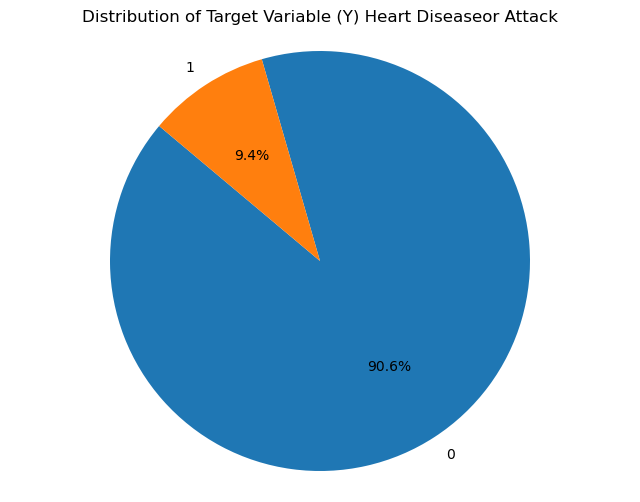

In [21]:
import matplotlib.pyplot as plt

# Assuming Y is your target variable
class_counts = Y.value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution of Target Variable (Y) Heart Diseaseor Attack')
plt.show()


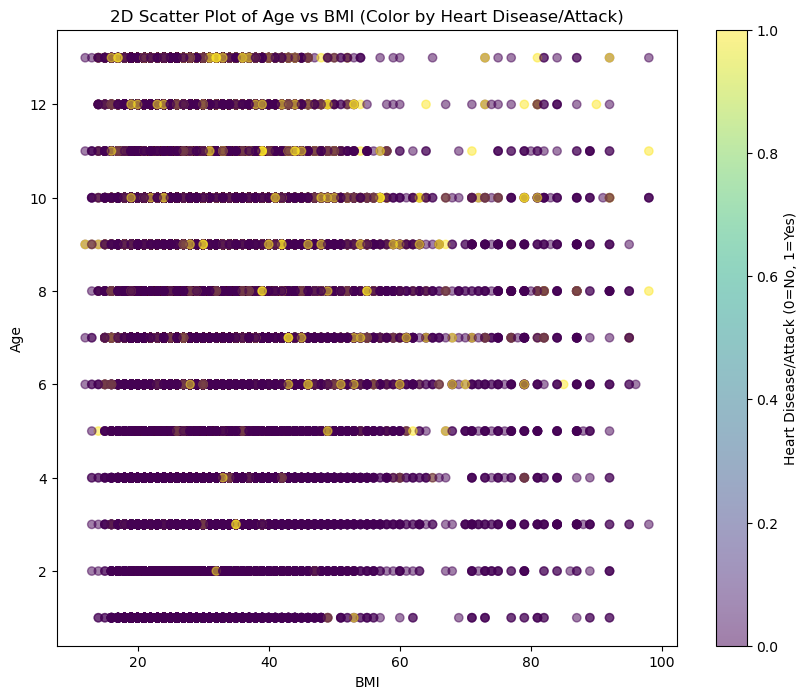

In [22]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# 'BMI' is on the x-axis, 'Age' is on the y-axis
# 'HeartDiseaseorAttack' is used for color indication

plt.figure(figsize=(10, 8))
plt.scatter(df['BMI'], df['Age'], c=df['HeartDiseaseorAttack'], cmap='viridis', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('2D Scatter Plot of Age vs BMI (Color by Heart Disease/Attack)')
plt.colorbar(label='Heart Disease/Attack (0=No, 1=Yes)')
plt.show()




1.train split

2.Oversampling

3.Confusion Matrix


In [47]:

Y = df.iloc[:, 0]
X = df.iloc[:, 1:]
                    

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=451)
print("strat")
#oversampling
rs = RandomOverSampler()
X_resampled, Y_resampled = rs.fit_resample(X_train, Y_train)

knn = KNeighborsClassifier(n_neighbors)

knn.fit(X_resampled, Y_resampled)
print(".....")    
accuracy = knn.score(X_test, Y_test)
accuracy     
#when k = 1   0.7606685983482152
#when k = 2   0.8781660851910985
#when k = 3   0.8491120178187768
#when k = 5   0.760885419746516
#when k = 7   0.7408195848855774
#when k = 10  0.7405633414148581
#when k = 15  0.7025210415311532
#when k = 30  0.7180927601364003


#do a plot with these

strat
.....


0.7408195848855774

In [48]:
#get ride of some variables
#then fit the model

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importance_'

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=451)
# Create a RandomOverSampler instance
rs = RandomOverSampler(random_state=451)

# Define a range of 'k' values to test
k_values = range(1, 11)  # for example, testing k from 1 to 10

# Store the average accuracies for each k
average_accuracies = []

for k in k_values:
    # Create a KNN model with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Create a pipeline with oversampling and the KNN model
    pipeline = make_pipeline(rs, knn)

    # Perform cross-validation and calculate average accuracy
    cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=5, scoring='accuracy')
    print(cv_scores)
    average_accuracy = np.mean(cv_scores)
    average_accuracies.append(average_accuracy)
    print(f'Average accuracy for k={k}: {average_accuracy:.4f}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Cross-Validated Accuracy')
plt.title('KNN Average Accuracy for Different k Values')
plt.xticks(k_values)
plt.show()

KeyboardInterrupt: 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=451)

# Oversampling using RandomOverSampler
rs = RandomOverSampler()
X_resampled, Y_resampled = rs.fit_resample(X_train, Y_train)

# Create and train the KNN model
n_neighbors = 5  # You can adjust this value
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_resampled, Y_resampled)

# Function to calculate feature importance using accuracy drop
def feature_importance_knn(model, X, y, feature_index):
    # Get the original predictions
    y_pred_orig = model.predict(X)

    # Permute the selected feature
    X_permuted = X.copy()
    np.random.shuffle(X_permuted[:, feature_index])

    # Get predictions with permuted feature
    y_pred_permuted = model.predict(X_permuted)

    # Calculate the performance drop due to permutation
    accuracy_drop = accuracy_score(y, y_pred_orig) - accuracy_score(y, y_pred_permuted)

    return accuracy_drop

# Calculate feature importances for all features
feature_importances = []
for feature_index in range(X_test.shape[1]):  # Loop through all features
    importance = feature_importance_knn(knn, X_test, Y_test, feature_index)
    feature_importances.append(importance)

# Sort and print feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
for idx in sorted_indices:
    print(f"Feature {idx}: Importance = {feature_importances[idx]}")

# Calculate accuracy on the test set
accuracy = knn.score(X_test, Y_test)
print(f"Model Accuracy: {accuracy}")


InvalidIndexError: (slice(None, None, None), 0)